In [13]:
import pandas as pd
import pickle
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [14]:
# Load pre-trained models and vectorizer
with open("../models/feature-bow.p", "rb") as f:
    vectorizer = pickle.load(f)

with open("../models/model-nb.p", "rb") as f:
    model_nb = pickle.load(f)

with open("../models/model-nn.p", "rb") as f:
    model_nn = pickle.load(f)

d:\My Stuff\Kuliah\Semester 5\Web App\data-crawling\venv\lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator CountVectorizer from version 0.22.2.post1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\My Stuff\Kuliah\Semester 5\Web App\data-crawling\venv\lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator MultinomialNB from version 0.22.2.post1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\My Stuff\Kuliah\Semester 5\Web App\data-crawling\venv\lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying

In [15]:
df = pd.read_csv("../outputs/cleaned_reviews.csv")
print(df.head())

                                              review  \
0  Laptop tergolong ringan,tidak terlalu besar......   
1  pengiriman cepat, spek barang sesuai, packing ...   
2        manntab respon cepet barang ok dan original   
3  Barang cepat sampai dan sesuai informasi, Admi...   
4  spek sesuai deskripsi, pengiriman gercep, sell...   

                                      cleaned_review  
0  laptop tergolong ringan tidak terlalu besar ma...  
1   pengiriman cepat spek barang sesuai packing aman  
2        manntab respon cepet barang ok dan original  
3  barang cepat sampai dan sesuai informasi admin...  
4  spek sesuai deskripsi pengiriman gercep seller...  


In [16]:
def predict_sentiments(df, text_column):
    # Transform text data
    X = vectorizer.transform(df['cleaned_review'])

    # Get probabilities from both models
    proba_nb = model_nb.predict_proba(X)
    proba_nn = model_nn.predict_proba(X)

    # Combine probabilities (tweak weights here!)
    weight_nb = 0.4  # Naive Bayes weight
    weight_nn = 0.6  # Neural Net weight

    combined_proba = (weight_nb * proba_nb) + (weight_nn * proba_nn)

    # Get class labels from models (should be the same order)
    classes = model_nb.classes_

    # Get final prediction based on max combined probability
    final_preds = [classes[np.argmax(p)] for p in combined_proba]

    # Store everything
    df['sentiment_nb'] = model_nb.predict(X)
    df['sentiment_nn'] = model_nn.predict(X)
    df['sentiment_final'] = final_preds
    
    return df

In [17]:
df = predict_sentiments(df, 'cleaned_review')
print(df.head())

                                              review  \
0  Laptop tergolong ringan,tidak terlalu besar......   
1  pengiriman cepat, spek barang sesuai, packing ...   
2        manntab respon cepet barang ok dan original   
3  Barang cepat sampai dan sesuai informasi, Admi...   
4  spek sesuai deskripsi, pengiriman gercep, sell...   

                                      cleaned_review sentiment_nb  \
0  laptop tergolong ringan tidak terlalu besar ma...     negative   
1   pengiriman cepat spek barang sesuai packing aman     positive   
2        manntab respon cepet barang ok dan original      neutral   
3  barang cepat sampai dan sesuai informasi admin...      neutral   
4  spek sesuai deskripsi pengiriman gercep seller...     negative   

  sentiment_nn sentiment_final  
0     positive        positive  
1     positive        positive  
2      neutral         neutral  
3     negative        negative  
4     negative        negative  


C:\Users\chesn\AppData\Local\Temp\ipykernel_18344\1811347562.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_nb', data=df, palette='viridis')
C:\Users\chesn\AppData\Local\Temp\ipykernel_18344\1811347562.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_nn', data=df, palette='plasma')


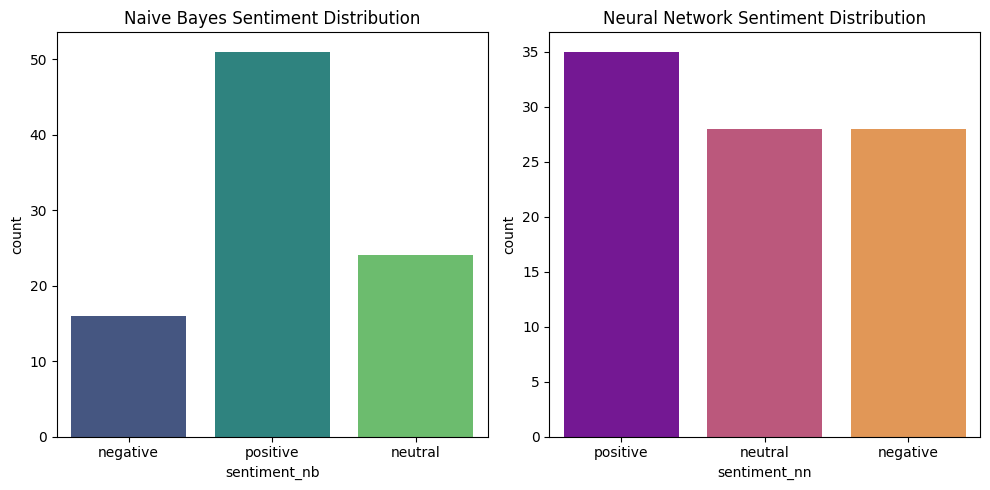

In [18]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.countplot(x='sentiment_nb', data=df, palette='viridis')
plt.title("Naive Bayes Sentiment Distribution")

plt.subplot(1, 2, 2)
sns.countplot(x='sentiment_nn', data=df, palette='plasma')
plt.title("Neural Network Sentiment Distribution")

plt.tight_layout()
plt.show()

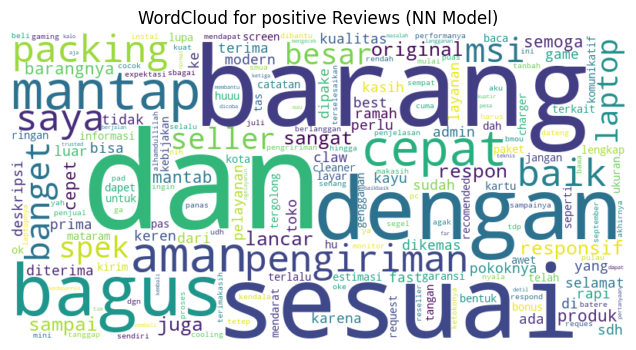

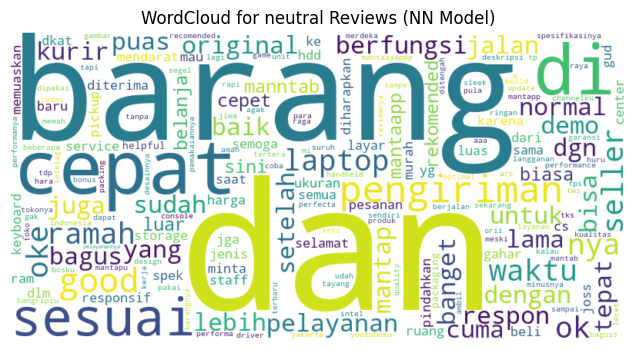

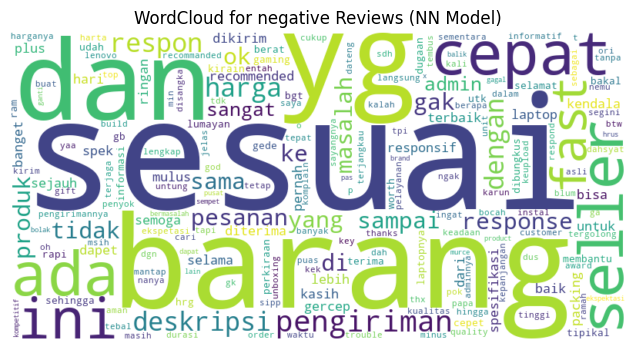

In [19]:
for sentiment in df['sentiment_nn'].unique():
    text = " ".join(df[df['sentiment_nn'] == sentiment]['cleaned_review'])
    wc = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(text)
    
    plt.figure(figsize=(8,4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud for {sentiment} Reviews (NN Model)")
    plt.show()

C:\Users\chesn\AppData\Local\Temp\ipykernel_18344\2436819217.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='word', x='count', data=top_words, palette='mako')


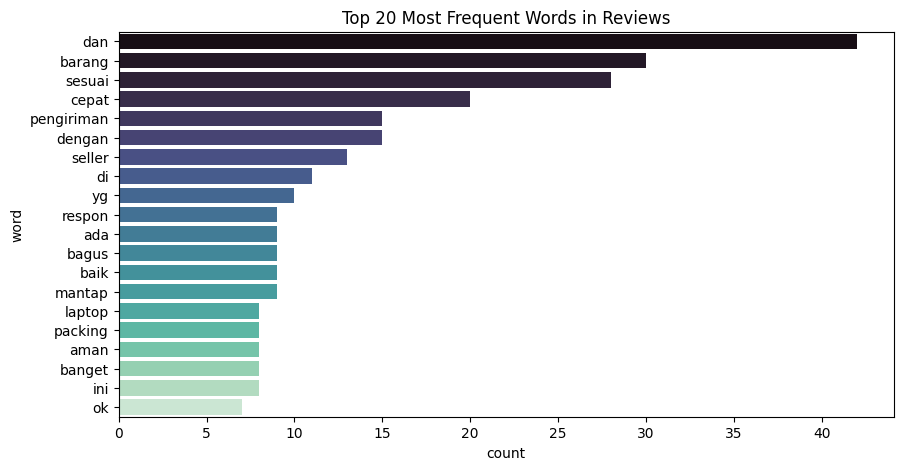

In [20]:
from collections import Counter
import re

# Combine all reviews
all_text = " ".join(df['cleaned_review'])
words = re.findall(r'\w+', all_text)
freq = Counter(words)

top_words = pd.DataFrame(freq.most_common(20), columns=['word', 'count'])

plt.figure(figsize=(10,5))
sns.barplot(y='word', x='count', data=top_words, palette='mako')
plt.title("Top 20 Most Frequent Words in Reviews")
plt.show()

In [21]:
df.to_csv("../outputs/tokopedia_sentiments.csv", index=False)
print("✅ Predictions saved to ../outputs/tokopedia_sentiments.csv")

✅ Predictions saved to ../outputs/tokopedia_sentiments.csv
